<a href="https://colab.research.google.com/github/yebiny/Lecture_deeplearning_basic/blob/main/2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 ( Logistic Regression )

>**목차**
1. 개념정리
2. 손실함수 : 크로스 엔트로피 (Cross Entropy)
3. 실습


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---


<br>

###<center> < 가설 > </center>
###  <center>$f(x)=\sigma(xW+b)$</center>

<br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \;J(y, \hat{y})$</center>
### <center> $ =arg \; min \;J(y, f(x))$</center>
### <center> $ =arg \; min \;J(y, \sigma(xW+b))$</center>

### **시그모이드 함수 ( Sigmoid funtion )**

</br>

### <center>$H(x) = \frac{1}{1+e^{(-x)}} = \sigma(x)$</center>

**<center> e(e=2.718281..):**  자연 상수

* 구현

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

* 시각화

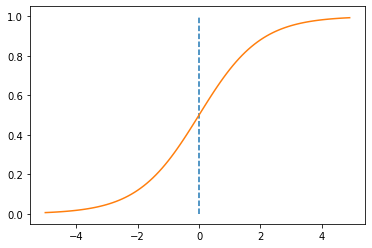

In [ ]:
x_arr = np.arange(-5, 5 , 0.1)
y_arr = []
for x in x_arr:
  y = sigmoid(x)
  y_arr.append(y)

y_arr = np.array(y_arr)

plt.plot([0,0],[0,1],linestyle='--')
plt.plot(x_arr, y_arr)

### **가설 구현**
###<center>$f(x)=\sigma(xW+b)$</center>

In [ ]:
def hypothesis(x, W, b=0):
  return sigmoid(np.dot(x,W)+b)

### **예제**

|라운드점수(X)|종합점수|결과(Y)
|------|---|---|
|-3|1|패배|
|-2|1|패배|
|-1|2|패배|
|0|3|패배|
|1|5|승리|
|2|8|승리|
|3|9|승리|


* 데이터 정의



In [ ]:
X = np.arange(-3,4,1).reshape(-1, 1)
Y = np.array([[0],
              [0],
              [0],
              [0],
              [1],
              [1],
              [1]])
X[0].shape, Y[0].shape

((1,), (1,))

* 예측

In [ ]:
W = np.array([[1]])
W.shape

for x in X:
  y_pred = hypothesis(x[0], W)
  print(y_pred)

[[0.04742587]]
[[0.11920292]]
[[0.26894142]]
[[0.5]]
[[0.73105858]]
[[0.88079708]]
[[0.95257413]]


* 시각화

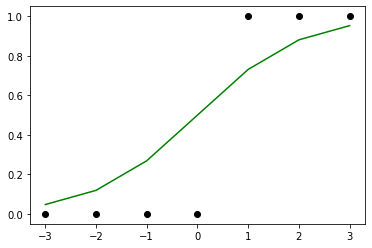

In [ ]:
plt.plot(X, Y, marker='o', linestyle='', color='k')
plt.plot(X, [hypothesis(x,W) for x in X], color='g')

### **학습 파라미터**

* W 값에 따른 함수의 변화

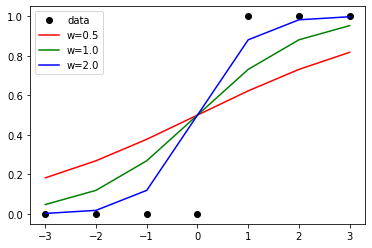

In [ ]:
plt.plot(X, Y, marker='o', linestyle='', color='k')
W = np.array([[0.5]])
plt.plot(X, [hypothesis(x,W) for x in X], color='r')
W = np.array([[1]])
plt.plot(X, [hypothesis(x,W) for x in X], color='g')
W = np.array([[2]])
plt.plot(X, [hypothesis(x,W) for x in X], color='b')

plt.legend(['data','w=0.5','w=1.0','w=2.0'])
plt.show()

* b값에 따른 함수의 변화

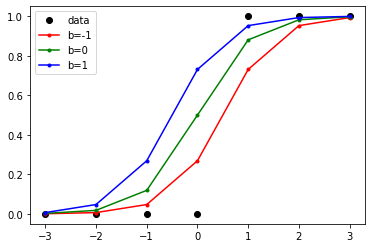

In [ ]:
plt.plot(X, Y, marker='o', linestyle='', color='k')
W = np.array([[2]])

b = -1
plt.plot(X, [hypothesis(x,W,b) for x in X], color='r', marker='.')
b = 0
plt.plot(X, [hypothesis(x,W,b) for x in X], color='g', marker='.')
b = 1
plt.plot(X, [hypothesis(x,W,b) for x in X], color='b', marker='.')

plt.legend(['data','b=-1','b=0','b=1'])
plt.show()

## 2. 손실함수: 크로스 엔트로피 (Cross Entropy)
---

</br>

## <center>$J(W) = -\frac{1}{n}\sum_{i=1}^{n}[y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$</center>

</br>

<center> $y = 1 \rightarrow cost(y, \hat{y}) = -log(\hat{y})$</center>
<center> $y = 0 \rightarrow cost(y, \hat{y}) = -log(1-\hat{y})$</center>


* 구현

In [ ]:
def J(y, y_pred):
  if y == 1:
    return -(np.log10(y_pred))

  elif y == 0:
    return -(np.log10(1-y_pred))

  else:
    return 0


* 시각화

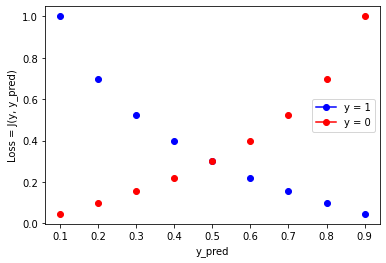

In [ ]:
y_pred_arr = np.arange(0.1, 1, 0.1)
for y_pred in y_pred_arr:
  plt.plot(y_pred, J(1, y_pred), marker='o', color='b')
  plt.plot(y_pred, J(0, y_pred), marker='o', color='r')

plt.legend(['y = 1', 'y = 0'])
plt.xlabel('y_pred')
plt.ylabel('Loss = J(y, y_pred)')
plt.show()


## 3. 실습
---

### **데이터**
|공부시간|집중도|수면시간|종합성적|합격여부|
|------|---|---|---|---|
|0|1|9|0|불합격|
|1|1|8.5|1.1|불합격|
|2|2|8|2.3|불합격|
|3|4|8|3.0|불합격|
|4|3|7|4.4|불합격|
|5|5|7.5|5.5|합격|
|6|6|7|6.1|합격|
|7|6|6|7.3|합격|
|8|7|7|8.4|합격|
|9|6|6.5|9.8|합격|

* 데이터 정의

In [ ]:
X = np.array([[0, 1, 9, 0],
              [1, 1, 8.5, 1.1],
              [2, 2, 8, 2.3],
              [3, 4, 8, 3.0],
              [4, 3, 7, 4.4],
              [5, 5, 7.5, 5.5],
              [6, 6, 7, 6.1],
              [7, 6, 6, 7.3],
              [8, 7, 7, 8.4],
              [9, 6, 6.5, 9.8]])
Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

* 시각화 

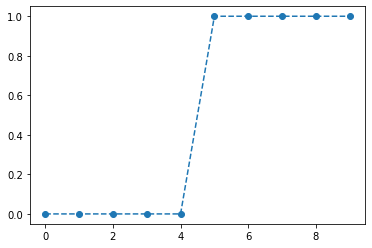

In [ ]:
plt.plot(Y, linestyle='--', marker='o')

###  **모델 생성**

* 케라스를 이용한 모델 구현

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=4, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [ ]:
W = model.get_weights()[0]
b = model.get_weights()[1]

print('W:',W,'b:',b)

W: [[ 0.6756476 ]
 [-0.5556424 ]
 [-0.47744548]
 [ 0.00187528]] b: [0.]


* 시각화

(10,) (10, 1)


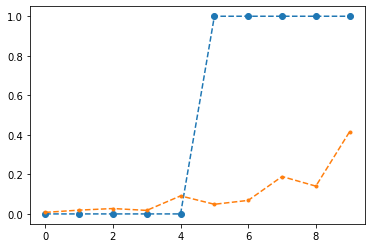

In [ ]:
Y_pred = model.predict(X)
print(Y.shape, Y_pred.shape)

plt.plot(Y, linestyle='--', marker='o')
plt.plot(Y_pred, linestyle='--', marker='.')
plt.show()

### **모델 학습**

* 모델 컴파일

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['acc']
              )

* 학습 진행

In [ ]:
model.fit(X, Y, epochs=1)

1/1 [==============================] - 0s 4ms/step - loss: 0.1359 - acc: 1.0000


### **결과**

* 학습 파라미터 확인

In [ ]:
W = model.get_weights()[0]
b = model.get_weights()[1]

print('W:',W,'b:',b)

W: [[ 1.0008601 ]
 [-0.14521359]
 [-0.7228296 ]
 [ 0.33016428]] b: [-0.03003764]


* 시각화

(10,) (10, 1)


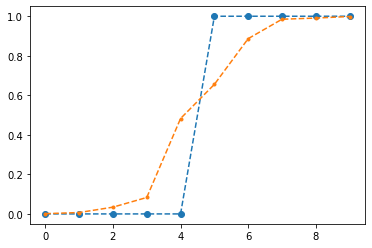

In [ ]:
Y_pred = model.predict(X)
print(Y.shape, Y_pred.shape)

plt.plot(Y, linestyle='--', marker='o')
plt.plot(Y_pred, linestyle='--', marker='.')
plt.show()